In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

In [10]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tharu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
DATASET_PATH = '../dataset/jobtitle/UpdatedResumeDataSet.csv'

In [12]:
resumeDataSet = pd.read_csv(DATASET_PATH, encoding="utf-8")
resumeDataSet["cleaned_resume"] = ""
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [13]:
def cleanResume(resumeText):
    resumeText = re.sub("http\S+\s*", " ", resumeText)  # remove URLs
    resumeText = re.sub("RT|cc", " ", resumeText)  # remove RT and cc
    resumeText = re.sub("#\S+", "", resumeText)  # remove hashtags
    resumeText = re.sub("@\S+", "  ", resumeText)  # remove mentions
    resumeText = re.sub(
        "[%s]" % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), " ", resumeText
    )  # remove punctuations
    resumeText = re.sub(r"[^\x00-\x7f]", r" ", resumeText)
    resumeText = re.sub("\s+", " ", resumeText)  # remove extra whitespace
    return resumeText


resumeDataSet["cleaned_resume"] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

## Visualize the distribution of categories

In [14]:
print("Displaying the distinct categories of resume -")
print(resumeDataSet["Category"].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Displaying the distinct categories of resume and the number of records belonging to each category -


<AxesSubplot:xlabel='count', ylabel='Category'>

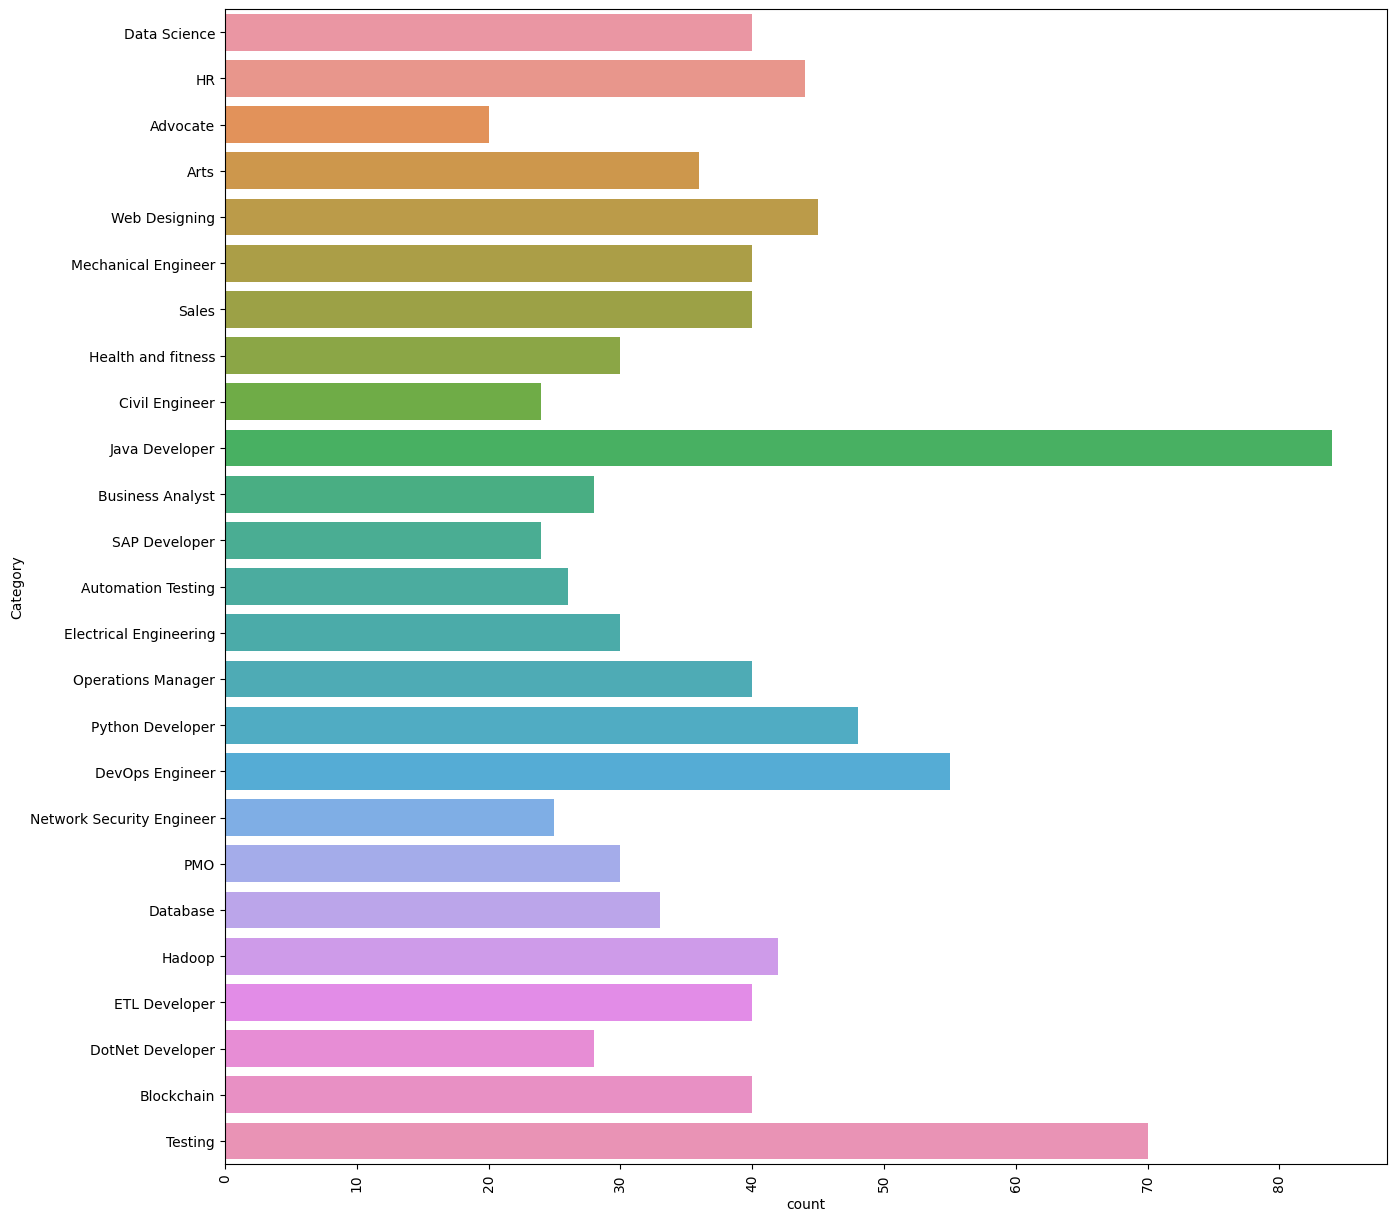

In [15]:
print(
    "Displaying the distinct categories of resume and the number of records belonging to each category -"
)
plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

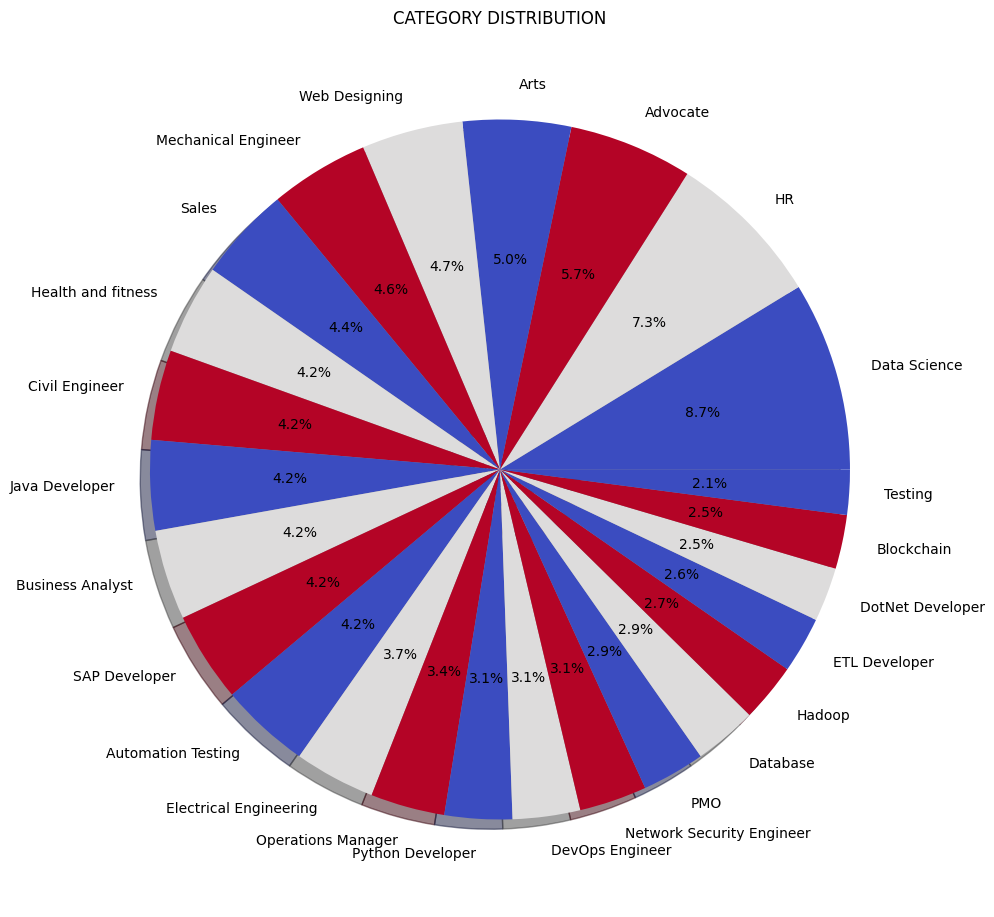

In [16]:
from matplotlib.gridspec import GridSpec

targetCounts = resumeDataSet["Category"].value_counts()
targetLabels = resumeDataSet["Category"].unique()
# Make square figures and axes
plt.figure(1, figsize=(25, 25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap("coolwarm")
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title="CATEGORY DISTRIBUTION")

source_pie = plt.pie(
    targetCounts, labels=targetLabels, autopct="%1.1f%%", shadow=True, colors=colors
)
plt.show()

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


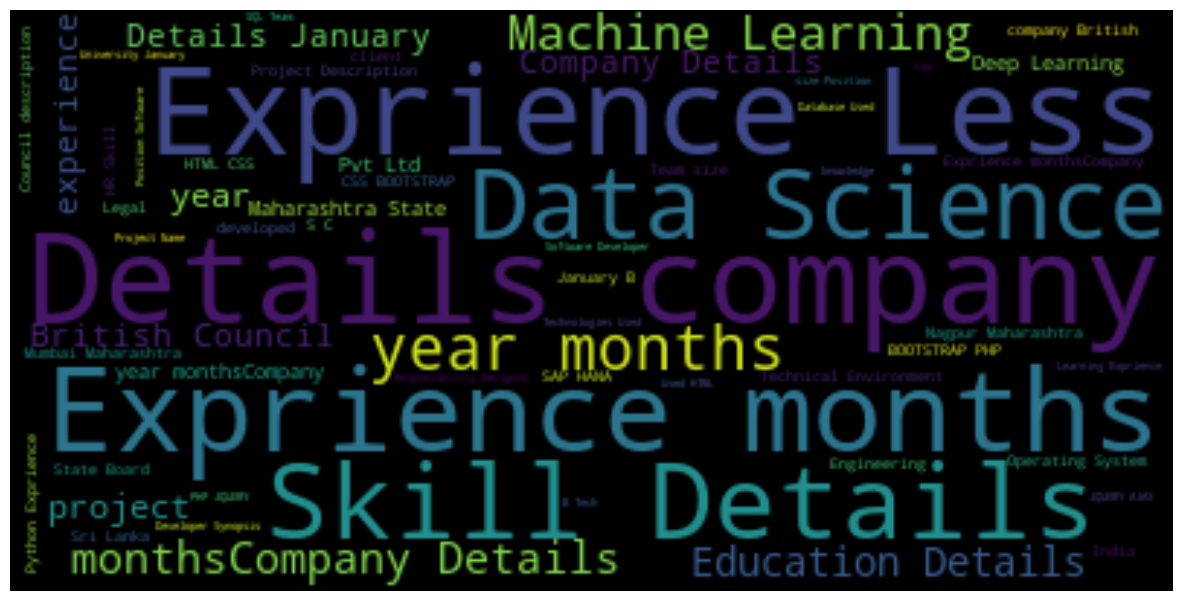

In [17]:

oneSetOfStopWords = set(stopwords.words("english") + ["``", "''"])
totalWords = []
Sentences = resumeDataSet["Resume"].values
cleanedSentences = ""
for i in range(0, 160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
var_mod = ["Category"]
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [19]:
requiredText = resumeDataSet["cleaned_resume"].values
requiredTarget = resumeDataSet["Category"].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True, stop_words="english", max_features=1500
)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("Feature completed .....")

X_train, X_test, y_train, y_test = train_test_split(
    WordFeatures, requiredTarget, random_state=0, test_size=0.2
)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 1500)
(193, 1500)


In [20]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [21]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(
    "Accuracy of KNeighbors Classifier on training set: {:.2f}".format(
        clf.score(X_train, y_train)
    )
)
print(
    "Accuracy of KNeighbors Classifier on test set: {:.2f}".format(
        clf.score(X_test, y_test)
    )
)

print(
    "\n Classification report for classifier %s:\n%s\n"
    % (clf, metrics.classification_report(y_test, prediction))
)

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [22]:
test_resume = word_vectorizer.transform(
    [
        " Tanuja Namburi Austin TX tanuja namburi 6966 Professional Summary Around 8 years of professional IT experience in Data warehousing ETL ELT technologies which includes requirements gathering data analysis design development system integration testing deployment and documentation Experience orchestrating ETL data pipelines using AWS Glue services Glue Job Crawler Data Catalog Athena Lambdas SNS and Event Bridge and building Datamart in Snowflake for Analytics Experience deploying AWS Infrastructure through CI CD pipelines using AWS CDK written in Python Jenkins and Bitbucket Experience developing data pipelines using PySpark data frames and SQL Experience in creating ETL data pipelines using Informatica PowerCenter for data movement from various sources into Datamart hosted on Oracle Proficient in writing complex queries Stored Procedures for ETL ELT Worked in Agile model performed code reviews conducting knowledge sharing sessions with other ETL developers on team Skills Framework PySpark SQL and Data frames Scripting Python Java ETL tool Informatica PowerCenter AWS Services Glue stack Studio Jobs Catalog Athena Crawlers Lambda functions CloudWatch SNS and CDK constructs SQL Oracle SQL server Snowflake Scheduling Event Bridge Control M and Maestro PROFESSIONAL EXPERIENCE Allstate Data Engineer Jan 2021 to present Responsibilities Implemented data pipelines to load Snowflake Datamart for Analytics using AWS services AWS Glue stack Lambdas SQS SNS Kinesis Firehose Python PySpark and SQL Deployed AWS Infrastructure for data pipelines using AWS CDK through Jenkins pipeline Investigating and fixing the bugs o urred in the production environment and providing the on call support Responsible for building scalable distributed data solutions using wide range of Big Data tools including Spark SPARK SQL Converted the PL SQL Procedures to Informatica mappings and at the same time created procedures in the database level for optimum performance of the mappings Performed Unit testing and maintained test logs and test cases for all the mappings Develop and support mappings that perform Extraction Transformation and load of source data into Derived Masters schema using various power center transformations like Source Qualifier Aggregator Filter Router Sequence Generator look up Rank Joiner Expression Stored Procedure SQL and update strategy to meet business logic in the mappings Charles Schwab ETL Developer Jan 2017 to Nov 2020 Responsibilities Worked on migration project to build more than 10 data pipelines for Snowflake cloud Datawarehouse Worked on POC project to compare the performance of different cloud Datawarehouse like Snowflake and Redshift Did POC on Azure service like Azure Data factory for ETL operations and measured the performance of SQL Datawarehouse Extensively worked in Data Extraction loading and transformation from source to target system using Teradata utilities like BTEQ Fastload and Multiload with Informatica Power Center Creating the Workflows Worklets Mappings Mapplets Reusable transformations and scheduling Workflows and sessions using Informatica Power Center Extensively worked on Teradata performance tuning activities by leveraging different techniques like creation of indexes identifying the candidates for table partitioning and providing recommendations to users clients on best coding practices Applying different compression techniques like Block Level compression and Multi Value compression and automation to identify the right candidates for compression Responsible for extracting data from different SAP modules like Financial A ounting Profit Center A ounting Cost Control etc Vistara ETL Developer Dec 2013 to Jan 2016 Responsibilities Created designed and implemented specifications and developed ETL processes to support the development and implementation of data warehouse projects using Informatica Extensively worked in Data Extraction loading and transformation from source to target system using Teradata utilities like BTEQ Fastload and Multiload Informatica Power Center Created Star Schema with slowly changing Dimension Type 1 and Type 2 Developed complex mappings using multiple sources and targets in different databases flat files and XML files Created pre and post load scripts to drop indexes and key constraints before session and rebuild those indexes and key constraints after the session completes Education Bachelor of Computer Science 2013 JNTU University Kakinada Page 5 "
    ]
)
test_resume

<1x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 182 stored elements in Compressed Sparse Row format>

In [1]:
le.inverse_transform(clf.predict(test_resume))[0]

NameError: name 'le' is not defined

In [25]:
# save models
import os
import pickle

SAVE_MODEL_PATH = '../models/jobtitle'

pickle.dump(clf, open(os.path.join(SAVE_MODEL_PATH, "OneVsRestClassifier.pkl"), "wb"))
pickle.dump(word_vectorizer, open(os.path.join(SAVE_MODEL_PATH, "TfidfVectorizer.pkl"), "wb"))
pickle.dump(le, open(os.path.join(SAVE_MODEL_PATH, "LabelEncoder.pkl"), "wb"))